[MicroscopyGPT: Generating Atomic-Structure Captions from Microscopy Images of 2D Materials with Vision-Language Transformers](https://pubs.acs.org/doi/10.1021/acs.jpclett.5c01257)

Author email: kchoudh2@jhu.edu



In [ ]:
# !pip install -q condacolab
# import condacolab
# condacolab.install()

In [1]:
# %%time
# import os
# os.chdir('/content')
# !rm -rf Software
# os.makedirs('/content/Software')
# os.chdir('/content/Software')
# !pip install uv
# if not os.path.exists('atomgpt'):
#   !rm -rf atomgpt
#   !git clone https://github.com/atomgptlab/atomgpt.git
#   os.chdir('atomgpt')
#   !uv pip install -q -e .

import yaml

# Load the YAML file
with open("credential.yaml", "r") as f:
    cred = yaml.safe_load(f)

api_key = cred["atomGPT-api-key"]

In [2]:
# Check imports
import sys

sys.path.append("atomgpt/")
import atomgpt
import os

os.environ.pop("MPLBACKEND", None)  # Remove the invalid backend
import matplotlib

matplotlib.use("Agg")  # Use a compatible backend
import matplotlib.pyplot as plt

os.chdir("atomgpt")

## Pretrained model inference

Let's try the model on FeTe (a superconducting material) STEM data.

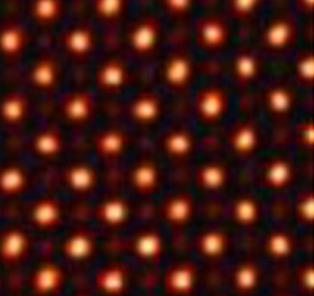

In [3]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

%matplotlib inline
from IPython.display import Image

# Input Image of FeTe from: https://www.nature.com/articles/s41467-020-17253-x
Image("atomgpt/examples/inverse_model_vision/FeTe.png")

See the pred_system POSCAR file printed below. You can visualize in VESTA or similar software.

In [4]:
%%time
!python atomgpt/inverse_models/inverse_vision_predict.py --image_path atomgpt/examples/inverse_model_vision/FeTe.png --formula FeTe

AtomGPT: OpenAI failed to import - ignoring for now.
AtomGPT 2025.5.7: Fast Mllama patching. Transformers: 4.51.3.
NVIDIA H100 80GB HBM3. Num GPUs = 4. Max memory: 79.209 GB. Platform: Linux.
Torch: 2.7.0+cu126. CUDA: 9.0. CUDA Toolkit: 12.6. Triton: 3.3.0
Bfloat16 = TRUE. FA [Xformers = 0.0.30. FA2 = False]

Loading checkpoint shards: 100%|██████████████████| 2/2 [01:16<00:00, 38.37s/it]

🔍 Running evaluation on samples...
pred_atoms System
1.0
3.87 0.0 0.0
0.0 3.87 0.0
0.0 0.0 18.76
Fe Te 
2 2 
direct
0.0 0.0 0.5 Fe
0.5 0.5 0.5 Fe
0.0 0.5 0.602 Te
0.0 0.5 0.398 Te


CPU times: user 937 ms, sys: 157 ms, total: 1.09 s
Wall time: 2min 24s


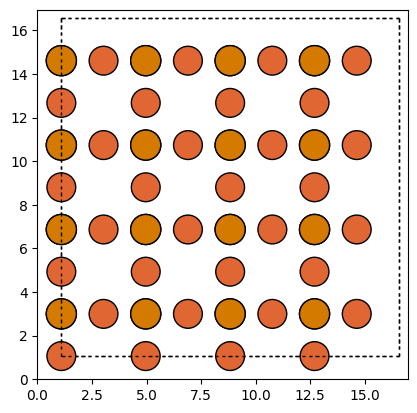

In [13]:
from ase.io import read
from ase.visualize import view
from ase.visualize.plot import plot_atoms

from io import StringIO

# Paste your structure text
poscar_str = """pred_atoms System
1.0
3.87 0.0 0.0
0.0 3.87 0.0
0.0 0.0 18.76
Fe Te
2 2
direct
0.0 0.0 0.5 Fe
0.5 0.5 0.5 Fe
0.0 0.5 0.602 Te
0.0 0.5 0.398 Te
"""

# Read from string as POSCAR
atoms = read(StringIO(poscar_str), format="vasp")
atoms = atoms * (4, 4, 1)
fig, ax = plt.subplots()
plot_atoms(atoms, ax, radii=0.5, rotation=("0x, 0y, 0z"))
plt.show()

The model generates atomic structure in the POSCAR format as shown above

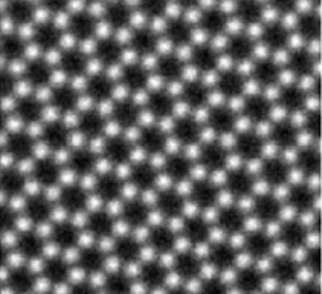

In [14]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

%matplotlib inline
from IPython.display import Image

# Input Image of graphene (C)
Image("atomgpt/examples/inverse_model_vision/C.png")

Similarly lets try in graphene

In [15]:
%%time
!python atomgpt/inverse_models/inverse_vision_predict.py --image_path atomgpt/examples/inverse_model_vision/C.png --formula C

AtomGPT: OpenAI failed to import - ignoring for now.
AtomGPT 2025.5.7: Fast Mllama patching. Transformers: 4.51.3.
NVIDIA H100 80GB HBM3. Num GPUs = 4. Max memory: 79.209 GB. Platform: Linux.
Torch: 2.7.0+cu126. CUDA: 9.0. CUDA Toolkit: 12.6. Triton: 3.3.0
Bfloat16 = TRUE. FA [Xformers = 0.0.30. FA2 = False]

Loading checkpoint shards: 100%|██████████████████| 2/2 [00:06<00:00,  3.39s/it]

🔍 Running evaluation on samples...
pred_atoms System
1.0
3.17 0.0 0.0
-1.53685 2.77254 0.0
0.0 0.0 15.0
C 
2 
direct
0.0 0.0 0.5 C
0.667 0.333 0.5 C


CPU times: user 218 ms, sys: 41.5 ms, total: 259 ms
Wall time: 35 s


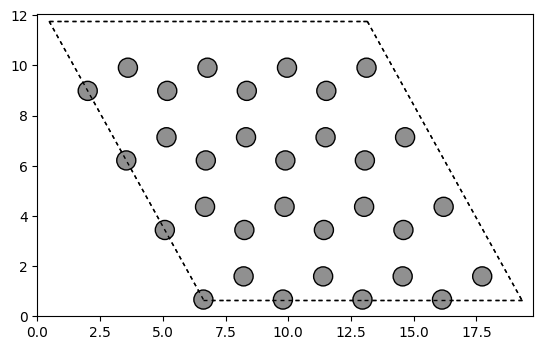

In [16]:
from ase.io import read
from ase.visualize import view
from ase.visualize.plot import plot_atoms

from io import StringIO

# Paste your structure text
poscar_str = """pred_atoms System
1.0
3.17 0.0 0.0
-1.53685 2.77254 0.0
0.0 0.0 15.0
C 
2 
direct
0.0 0.0 0.5 C
0.667 0.333 0.5 C
"""

# Read from string as POSCAR
atoms = read(StringIO(poscar_str), format="vasp")
atoms = atoms * (4, 4, 1)
fig, ax = plt.subplots()
plot_atoms(atoms, ax, radii=0.5, rotation=("0x, 0y, 0z"))
plt.show()

Now lets try it on MoS2

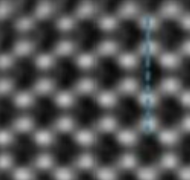

In [8]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

%matplotlib inline
from IPython.display import Image

# Input Image of MoS2
Image("atomgpt/examples/inverse_model_vision/MoS2.png")

In [9]:
%%time
!python atomgpt/inverse_models/inverse_vision_predict.py --image_path atomgpt/examples/inverse_model_vision/MoS2.png --formula MoS2

Standard import failed for AtomGPTRLOOTrainer: No module named 'AtomGPTRLOOTrainer'. Using tempfile instead!
AtomGPT 2025.5.7: Fast Mllama patching. Transformers: 4.51.3.
NVIDIA H100 80GB HBM3. Num GPUs = 4. Max memory: 79.209 GB. Platform: Linux.
Torch: 2.7.0+cu126. CUDA: 9.0. CUDA Toolkit: 12.6. Triton: 3.3.0
Bfloat16 = TRUE. FA [Xformers = 0.0.30. FA2 = False]

Loading checkpoint shards: 100%|██████████████████| 2/2 [00:03<00:00,  1.54s/it]

🔍 Running evaluation on samples...
pred_atoms System
1.0
3.18 0.0 0.0
-1.54169 2.78129 0.0
0.0 0.0 18.76
Mo S 
1 2 
direct
0.0 0.0 0.5 Mo
0.667 0.333 0.587 S
0.667 0.333 0.413 S


CPU times: user 797 ms, sys: 97.3 ms, total: 894 ms
Wall time: 37 s


##Training example.

Note you might have to restart session because of limited memory on colab.

Change dft_2d to c2db or alex_pbe_2d_all if you need larger training set as given here https://atomgptlab.github.io/jarvis-tools/databases/.

Remove max_samples command to train on entire dataset

In [10]:
!pwd

/workspace/atomgpt


In [ ]:
%%time
!python atomgpt/inverse_models/inverse_vision.py --dataset dft_2d --max_samples 10

In [ ]:
!pip freeze